In [1]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Compute the following:

- Comparison with surveys of ethnic stereotypes 

Common Chinese surnames: [ 'Wu', 'Li', 'Yang', 'Wang']

Common White surnames = ['Smith', 'Johnson', 'Miller', 'Brown']

Common Mexican surnames = ['Garcia', 'Rodriguez', 'Sanchez', 'Hernandez']

Stereotypes = ['Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive','Unstable','Transparent','Monstrous','Forceful','Hateful','Fixed','Cruel','Active','Greedy','Sensitive', 'Bizarre', 'Hearty']


In [2]:
# Define the list of model prefixes
decades = {
    '1921_1930': 1920,
    '1931_1940': 1930,
    '1941_1950': 1940,
    '1951_1960':1950,
    '1961_1970':1960,
    '1971_1980':1970,
    '1981_1990':1980,
    '1991_2000':1990,
    '2001_2010':2000
}

c:\Users\prith\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


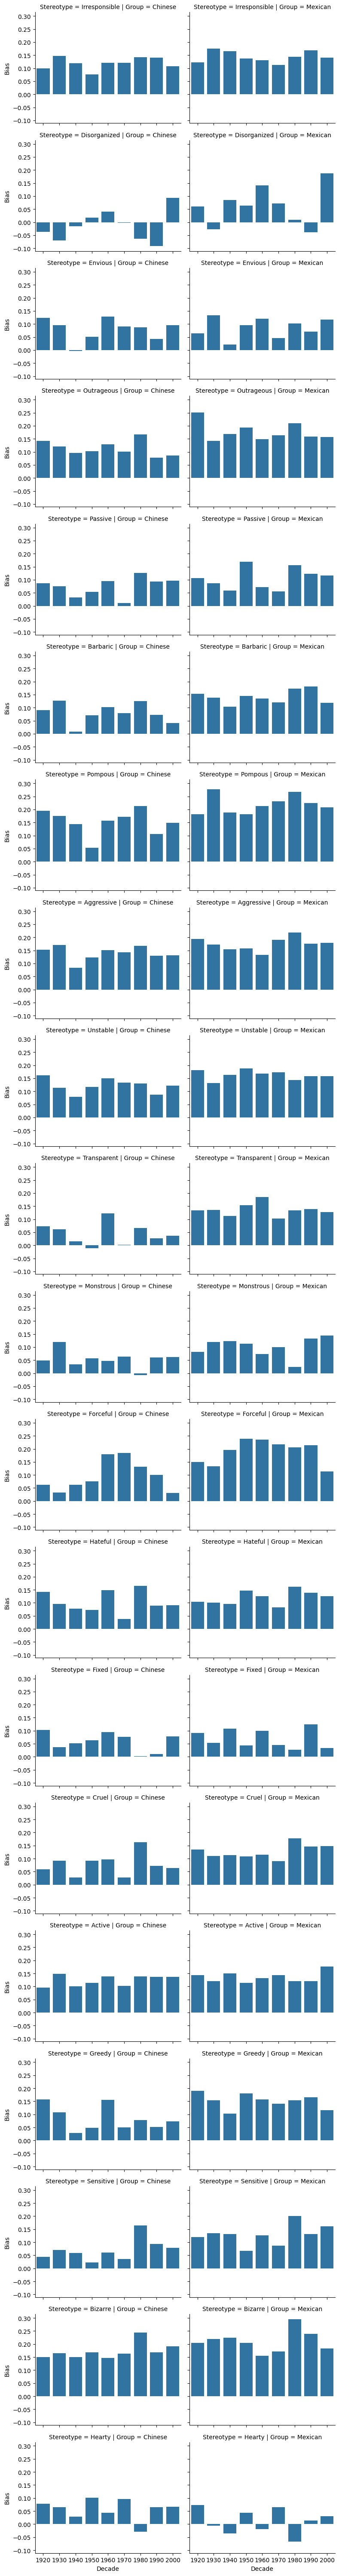

In [3]:
# Define list of all common last names
CHINESE_LAST_NAMES = [ 'Wu', 'Li', 'Yang', 'Wang']
WHITE_LAST_NAMES = ['Smith', 'Johnson', 'Miller', 'Brown']
MEXICAN_LAST_NAMES = ['Garcia', 'Rodriguez', 'Sanchez', 'Hernandez']

# Define list of stereotype words
STEREOTYPE_WORDS = ['Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive','Unstable','Transparent','Monstrous','Forceful','Hateful','Fixed','Cruel','Active','Greedy','Sensitive', 'Bizarre', 'Hearty']
# Initialize an empty DataFrame to store bias values

GROUPS = ['Chinese', 'Mexican']

bias_array=[]

# Calculate bias for each group in every decaded with White names as baseline
for decade in decades:
    # Load the model
    model_filename = f"word2vec-movies_{decade}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    for group in GROUPS:
        if group == 'Chinese':
            group_names=CHINESE_LAST_NAMES
        else:
            group_names=MEXICAN_LAST_NAMES
        for stype in STEREOTYPE_WORDS:
            base_similarities = []
            group_similarities =[]
            for name in WHITE_LAST_NAMES:
                base_similarities.append(model.wv.similarity(name.lower(), stype.lower()))
            for name in group_names:
                group_similarities.append(model.wv.similarity(name.lower(), stype.lower()))
            bias = np.mean(group_similarities)-np.mean(base_similarities)
            d = {
                'Group': group,
                'Stereotype': stype,
                'Decade': decades[decade],
                'Bias': bias
            }
            bias_array.append(d)

bias_df = pd.DataFrame.from_dict(bias_array)

grid = sns.FacetGrid(bias_df, row='Stereotype', col='Group', sharex=True, sharey=True, aspect=4/3)
grid.map(sns.barplot, 'Decade', 'Bias')
plt.tight_layout()

### Quantifying Changing Attitudes with Adjective Embeddings

We compare the word 'women' with various adjectives.

<Axes: xlabel='Decade', ylabel='Decade'>

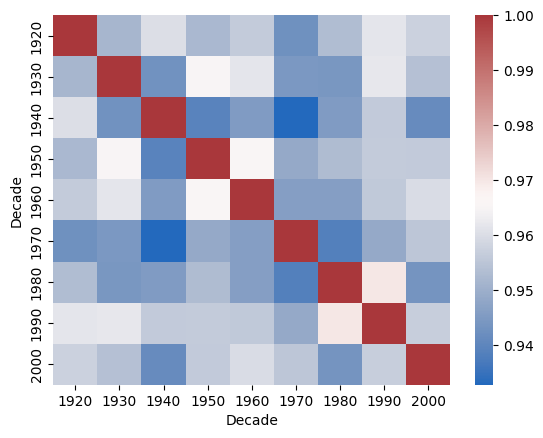

In [31]:
ADJECTIVES = []

with open('./adjectives.txt', 'r') as file:
    for line in file:
        ADJECTIVES.append(line.strip())

similarity_array=[]

# Calculate bias for each group in every decaded with White names as baseline
for decade in decades:
    # Load the model
    model_filename = f"word2vec-movies_{decade}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    for adjective in ADJECTIVES:
        try:
            similarity = model.wv.similarity('female', adjective)
            d = {
                'Adjective': adjective,
                'Decade': decades[decade],
                'Sim': similarity
            }
            similarity_array.append(d)
        except:
            continue

sim_df = pd.DataFrame.from_dict(similarity_array).pivot_table(index=['Adjective'],columns='Decade',values='Sim')

sns.heatmap(sim_df.corr(), cmap='vlag')